In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt
from scipy.signal import convolve2d, correlate2d
import vision.sim_tools.kernels.center_surround as csgen
import vision.sim_tools.kernels.gabor as gabgen
from vision.spike_tools.vis import my_imshow

def mse(mat0, mat1):
    return ((mat0 - mat1)**2).mean()


(-0.1825167823773711, 0.34327059639417767)
6.32827124036e-15
1.0


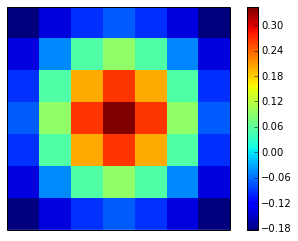

In [16]:
kernel_w = 7
std_dev = 1.866664
sd_mult = 6.7
csk = csgen.center_surround_kernel(kernel_w, std_dev, sd_mult)
print(csk.min(), csk.max())
print(csk.sum())
print((csk**2).sum())
fig = plt.figure()
ax = plt.subplot(1,1,1)
im = my_imshow(ax, csk, cmap=None)#, vmin=-1, vmax=1)
fig.colorbar(im, ax=ax)
plt.show()

(-0.091427784983838065, 0.15932600306533812)
-1.07969189145e-14
1.0


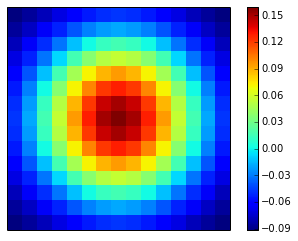

In [31]:
kernel_w = 15
std_dev = 4.
sd_mult = 6.7
csk = csgen.center_surround_kernel(kernel_w, std_dev, sd_mult)
print(csk.min(), csk.max())
print(csk.sum())
print((csk**2).sum())
fig = plt.figure()
ax = plt.subplot(1,1,1)
im = my_imshow(ax, csk, cmap=None)#, vmin=-1, vmax=1)
fig.colorbar(im, ax=ax)
plt.show()

In [5]:
cs_corr0 = convolve2d(csk, csk, mode='same', boundary='wrap')
print(cs_corr0)
cs_corr1 = correlate2d(csk, csk, mode='same')
print(cs_corr1)

[[-0.67687575 -0.46200221 -0.19388909 -0.07443931 -0.19388909 -0.46200221
  -0.67687575]
 [-0.46200221 -0.18707677  0.15596298  0.30879298  0.15596298 -0.18707677
  -0.46200221]
 [-0.19388909  0.15596298  0.59248852  0.78696696  0.59248852  0.15596298
  -0.19388909]
 [-0.07443931  0.30879298  0.78696696  1.          0.78696696  0.30879298
  -0.07443931]
 [-0.19388909  0.15596298  0.59248852  0.78696696  0.59248852  0.15596298
  -0.19388909]
 [-0.46200221 -0.18707677  0.15596298  0.30879298  0.15596298 -0.18707677
  -0.46200221]
 [-0.67687575 -0.46200221 -0.19388909 -0.07443931 -0.19388909 -0.46200221
  -0.67687575]]
[[-0.3023908  -0.30692267 -0.17391623 -0.04348261 -0.17391623 -0.30692267
  -0.3023908 ]
 [-0.30692267 -0.2255815   0.0272694   0.2259604   0.0272694  -0.2255815
  -0.30692267]
 [-0.17391623  0.0272694   0.41149886  0.68217617  0.41149886  0.0272694
  -0.17391623]
 [-0.04348261  0.2259604   0.68217617  1.          0.68217617  0.2259604
  -0.04348261]
 [-0.17391623  0.027269

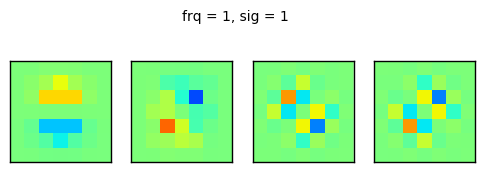

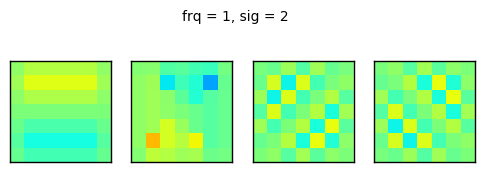

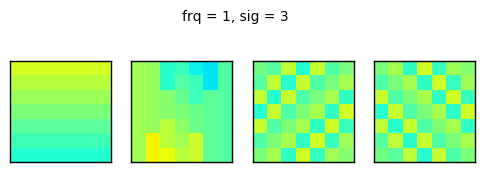

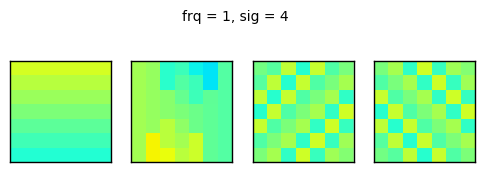

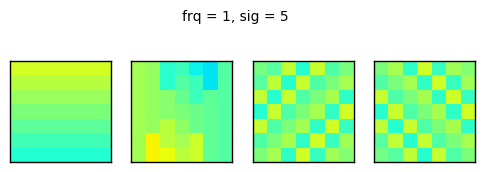

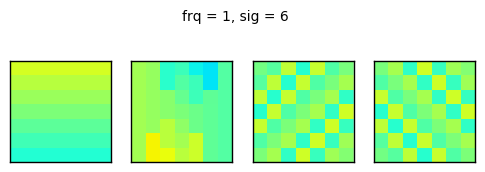

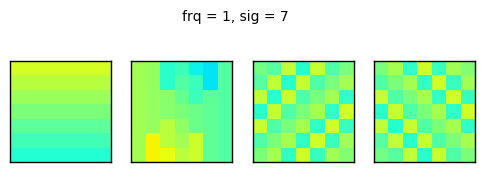

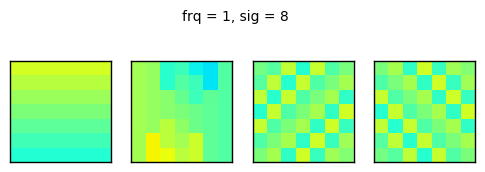

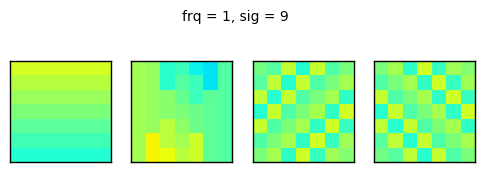

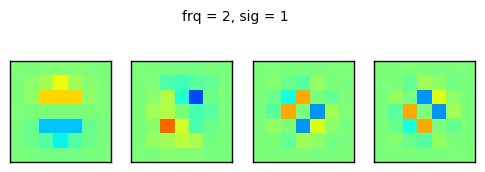

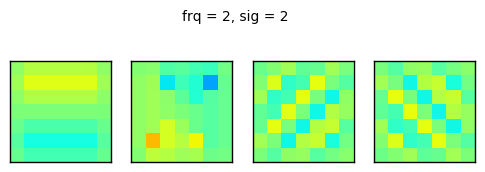

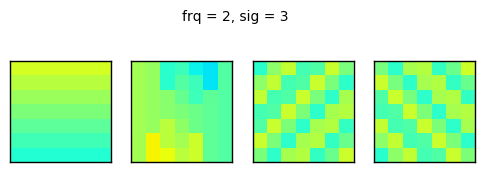

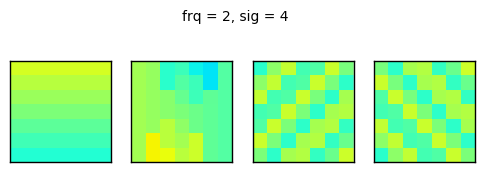

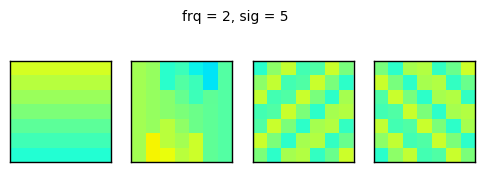

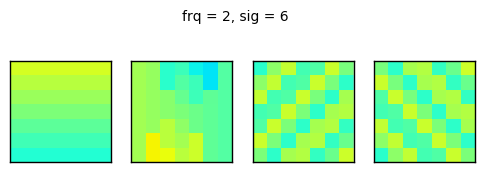

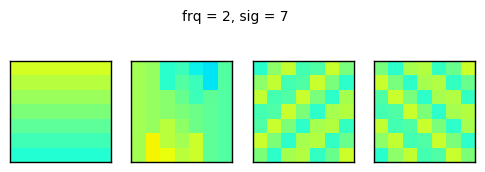

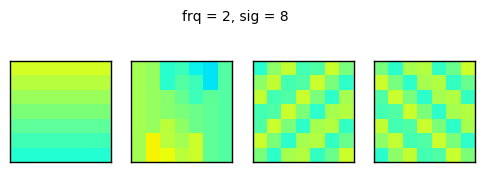

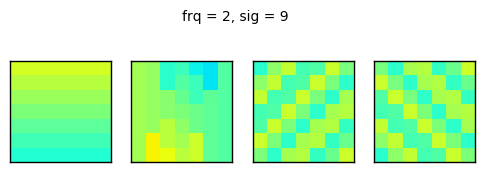

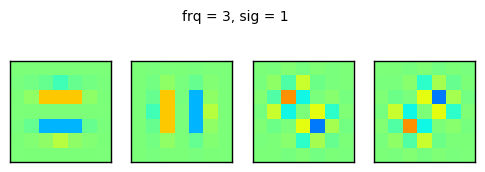

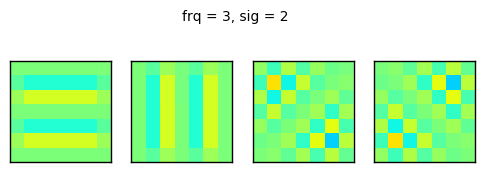

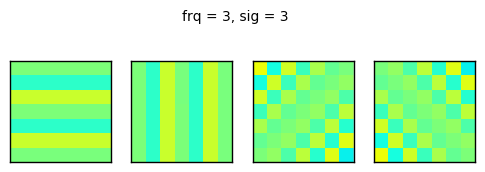

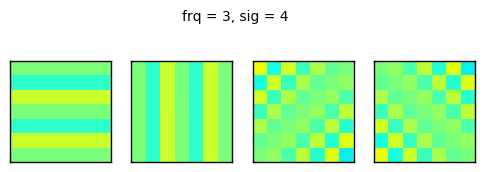

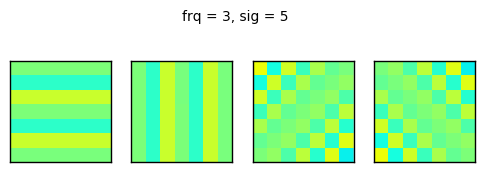

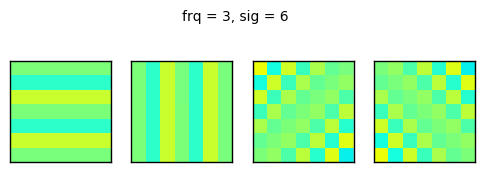

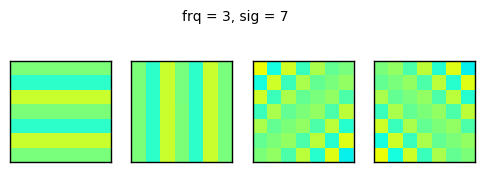

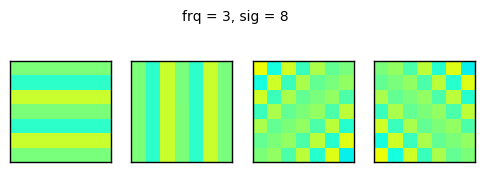

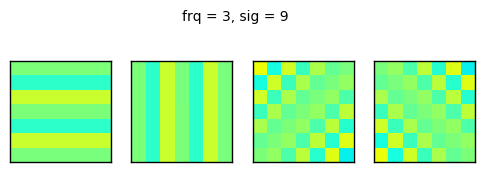

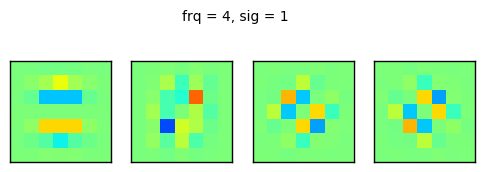

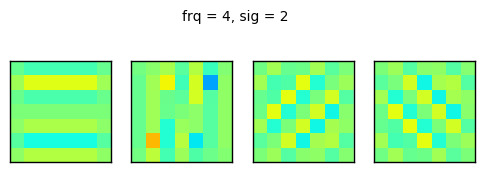

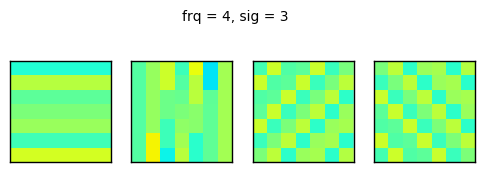

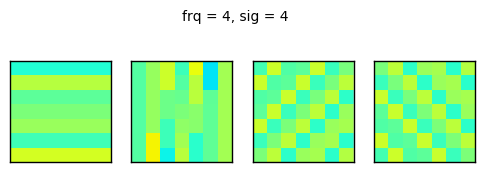

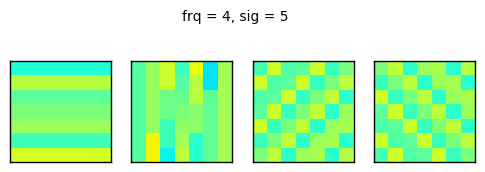

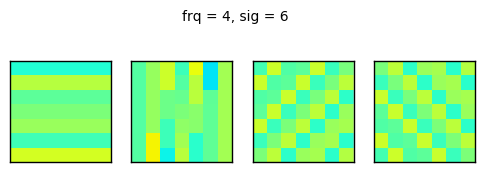

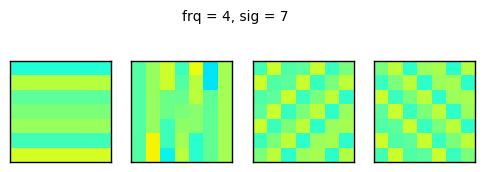

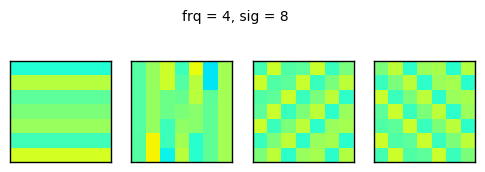

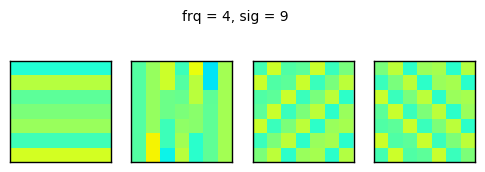

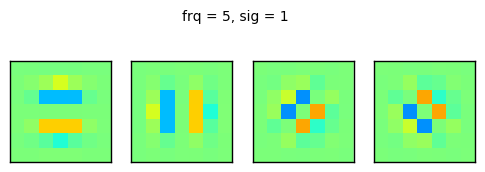

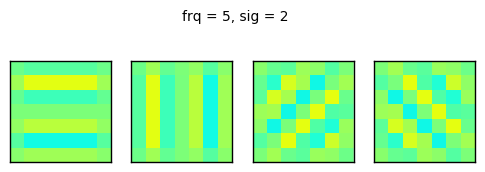

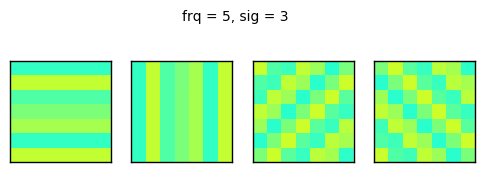

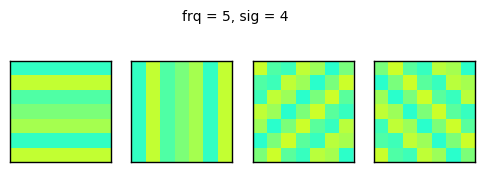

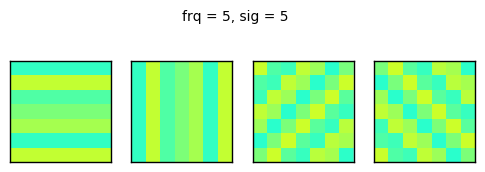

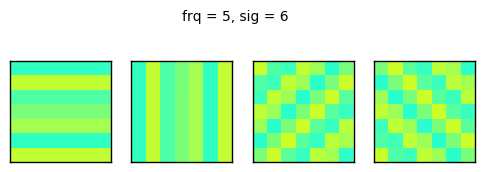

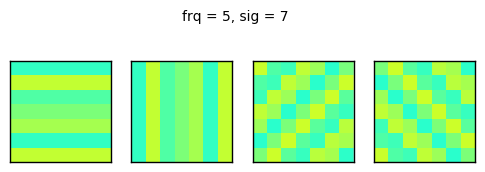

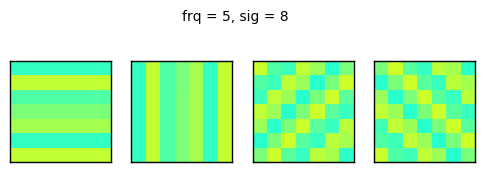

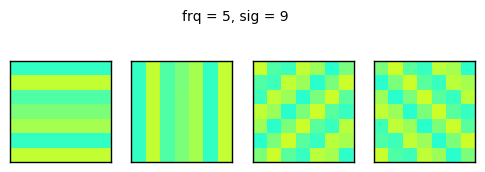

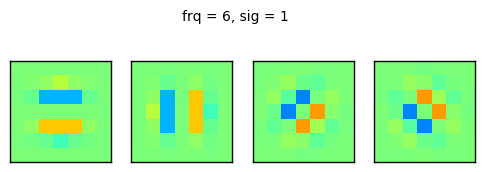

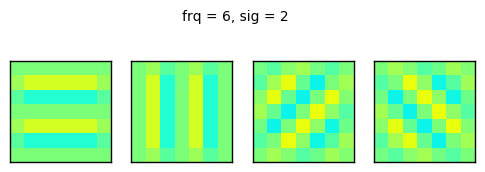

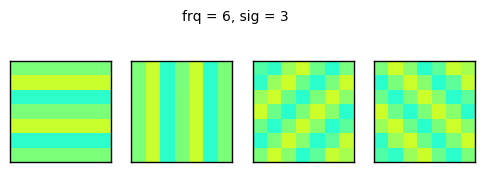

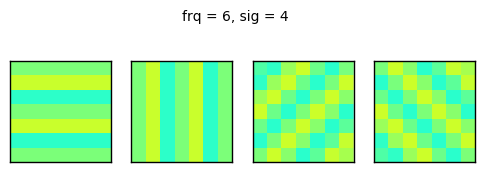

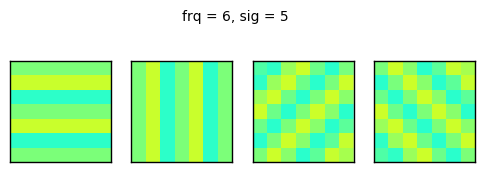

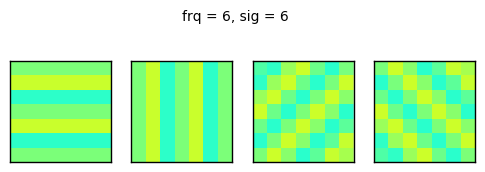

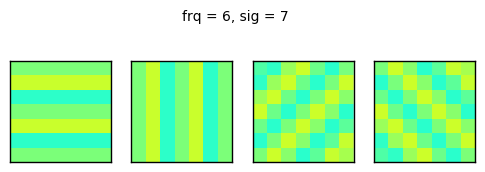

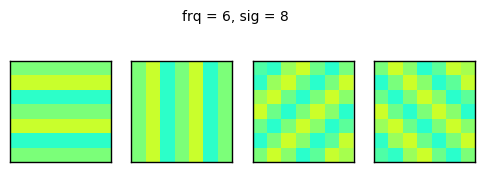

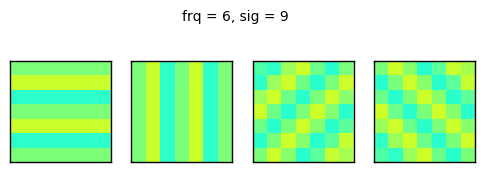

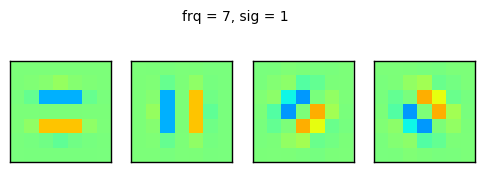

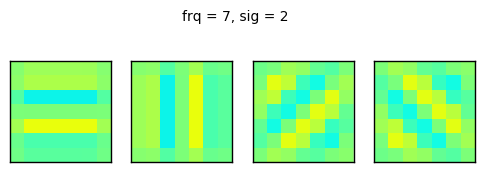

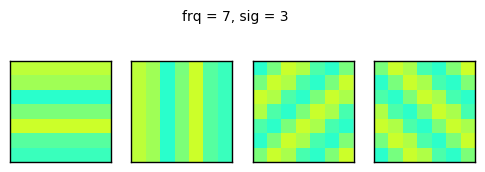

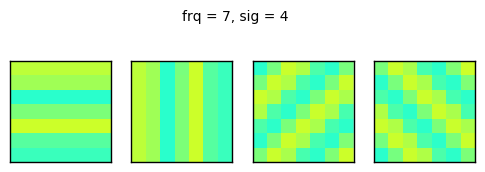

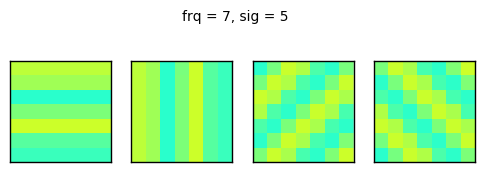

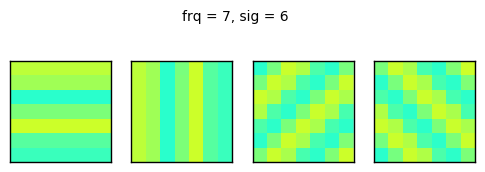

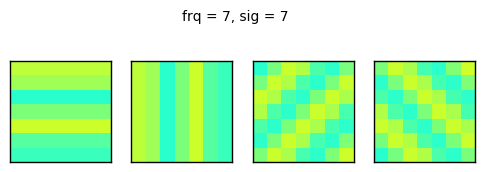

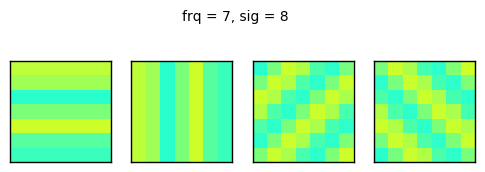

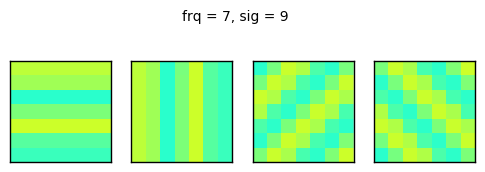

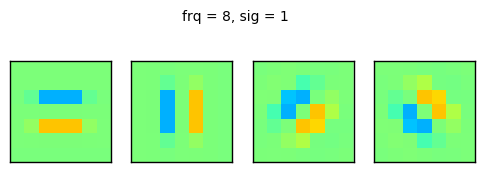

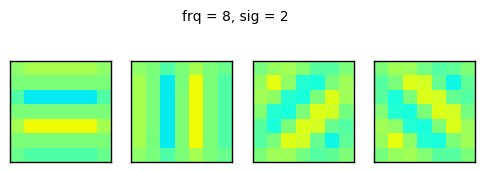

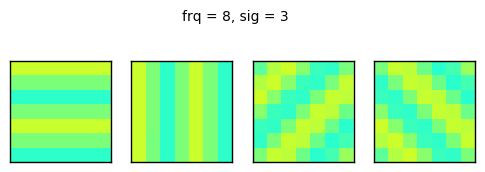

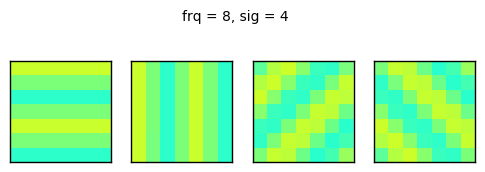

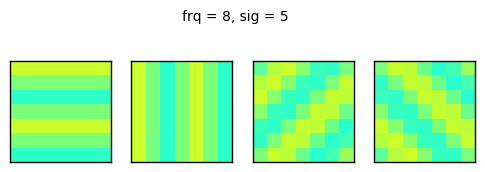

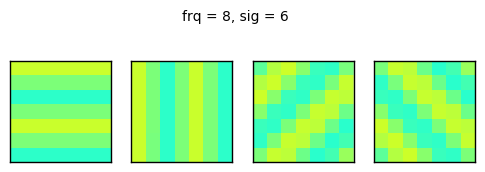

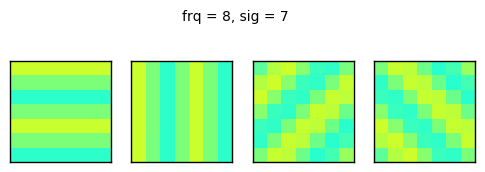

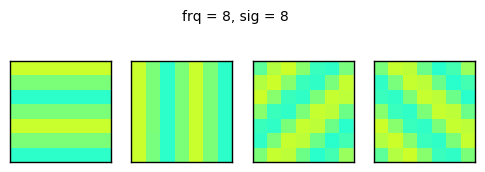

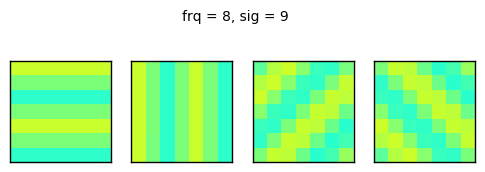

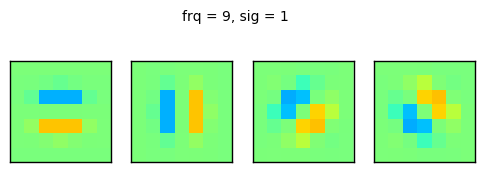

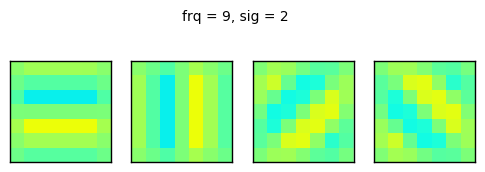

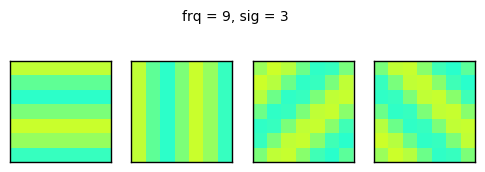

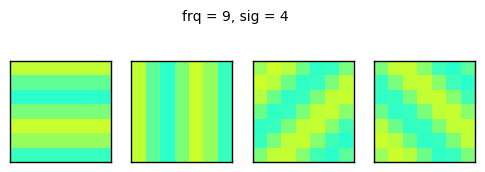

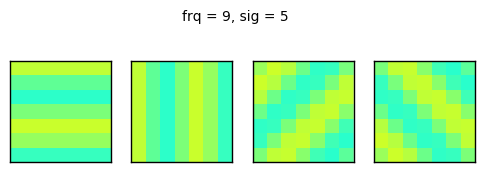

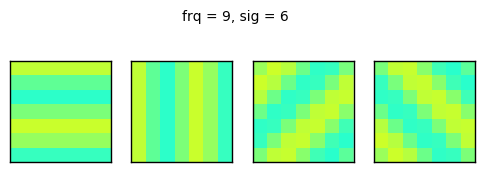

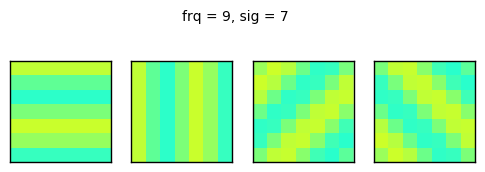

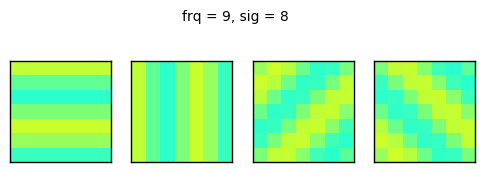

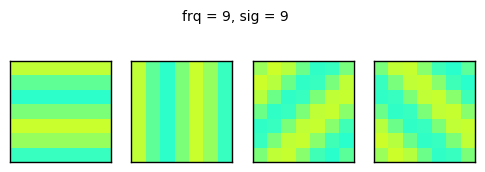

In [6]:
# freq = 4.
# print( np.cos(90*(np.pi/180.)) )
freq = 1.#5.
sig = 3.
pi_divs = 4
# pi_frac = 45.*np.pi/180.
pi_frac = np.pi/float(pi_divs)

for freq in range(1, 10):
    for sig in range(1, 10):
        gk = gabgen.multi_gabor(kernel_w, [i*pi_frac for i in range(pi_divs)],
                                sig, freq)
        # print([i*pi_frac*180./np.pi for i in range(pi_divs)])
        cols = 4
        rows = len(gk)//cols + 1
        plt.figure()
        plt.suptitle("frq = %d, sig = %d"%(freq, sig))
        div = 0
        for k in gk.keys():
            div += 1
            ax = plt.subplot(rows, cols, div)
#             my_imshow(ax, gk[k], vmin=-1, vmax=1)#, interpolation='bilinear')
            my_imshow(ax, gk[k],cmap=None, vmin=-1, vmax=1)#, interpolation='bilinear')
#             my_imshow(ax, gk[k], interpolation='bilinear')
        plt.show()

In [7]:
cols = 4
rows = len(gk)//cols + 1
div = 0
plt.figure()
for k in gk:
    kc = convolve2d(k, k, mode='same')
    print(kc)
    div += 1
    ax = plt.subplot(rows, cols, div)
    my_imshow(ax, kc, vmin=-1, vmax=1)#, interpolation='bilinear')
plt.show()

ValueError: convolve2d inputs must both be 2D arrays